<a href="https://colab.research.google.com/github/learningwithkamal/ML_Basics/blob/master/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
titanic_df = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/learningwithkamal/ML_Basics/master/Titanic_train.csv")
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [ ]:
print(titanic_df.apply(lambda x: sum(x.isnull()),axis=0))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64


# there are missing values in “Age”,“Cabin” and “Embarked” features

# “Name”, “Sex”, “Ticket”, “Cabin” and “Embarked” are all non-numeric features

# **Label encoding of "Sex"**

In [ ]:
titanic_df["Sex"] = titanic_df["Sex"].map({"male": 1, "female":0})
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


# check the current content of the “Embarked” feature:

In [ ]:
print(titanic_df['Embarked'].value_counts(ascending=True))
print(titanic_df['Embarked'].value_counts(normalize=True,ascending=True))

Q     77
C    168
S    644
Name: Embarked, dtype: int64
Q    0.086614
C    0.188976
S    0.724409
Name: Embarked, dtype: float64


# we can fill “S” into the 2 missing values and map all values into numbers.




In [ ]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df['Embarked'] = titanic_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# **Scrubbing**
# For “Cabin” feature, since there are 687 out of 891 missing records, we can simply skip this feature.
# There is no null values in “Ticket” feature, but we hardly find relationship between survival rate and ticket number, so we skip this feature as well.

# **Now we anlayze the non-numberic feature "Name"**
# Each value of this feature has a title i.e. Mr, Mrs 

In [ ]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())
print(titanic_df['Title'].value_counts(ascending=True, dropna=False))

Sir               1
the Countess      1
Ms                1
Jonkheer          1
Lady              1
Mme               1
Capt              1
Don               1
Major             2
Col               2
Mlle              2
Rev               6
Dr                7
Master           40
Mrs             125
Miss            182
Mr              517
Name: Title, dtype: int64


# We group different titles according to their similarity
And see their relation with survival rate

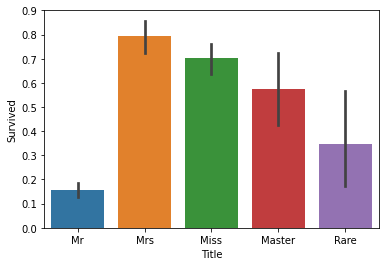

In [ ]:
titanic_df["Title"] = titanic_df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

sns.barplot(x="Title", y="Survived", data=titanic_df)
 
plt.show()

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic_df['Title'] = titanic_df['Title'].map(title_mapping)
 
titanic_df = titanic_df.drop(["Name", "Ticket", "Cabin",'Name_wiki','Hometown','Boarded','Destination','Lifeboat','Body','WikiId'], axis=1)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_wiki,Class,Title
0,1,0.0,3,1,22.0,1,0,7.2500,0,22.0,3.0,1
1,2,1.0,1,0,38.0,1,0,71.2833,1,35.0,1.0,3
2,3,1.0,3,0,26.0,0,0,7.9250,0,26.0,3.0,2
3,4,1.0,1,0,35.0,1,0,53.1000,0,35.0,1.0,3
4,5,0.0,3,1,35.0,0,0,8.0500,0,35.0,3.0,1


# Now we focus on SibSP and Parch features
Adding derived features withParents and withSib

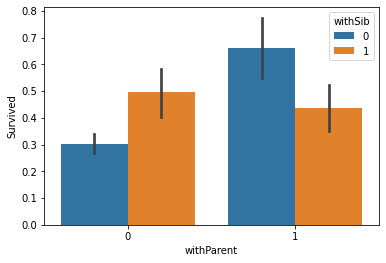

In [ ]:
titanic_df['withParent']=0
titanic_df['withSib']=0
 

titanic_df.loc[titanic_df['SibSp'] > 0,'withSib'] = 1
titanic_df.loc[titanic_df['Parch'] > 0, 'withParent'] = 1
 
sns.barplot(x="withParent", y="Survived", hue="withSib", data=titanic_df)
plt.show()

This shows Parent children have better chance of survival

# **Scaling**

Now we look at Fare
There are extreme values inside the “Fare” feature. On this case, we can use logarithm to remove the impact of extreme values.


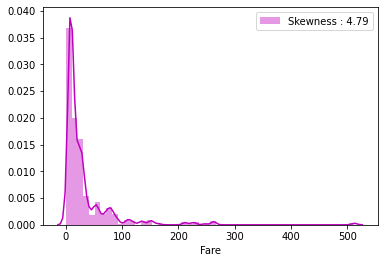

In [ ]:
fare_dist = sns.distplot(titanic_df["Fare"], color="m", label="Skewness : %.2f"%(titanic_df["Fare"].skew()))
fare_dist = fare_dist.legend(loc="best")
plt.show()

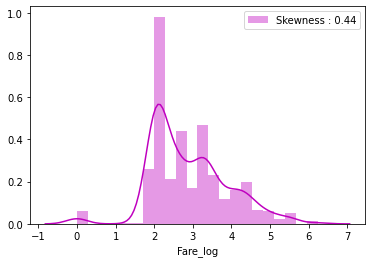

In [ ]:
titanic_df["Fare"] = titanic_df["Fare"].fillna(titanic_df["Fare"].median())
titanic_df['Fare_log'] = titanic_df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
 
fare_log_dist = sns.distplot(titanic_df["Fare_log"], color="m", label="Skewness : %.2f"%(titanic_df["Fare_log"].skew()))
fare_log_dist = fare_log_dist.legend(loc="best")
plt.show()

For the Age feature in our training data set, there are 177 out of 891 missing values. First, we would like to know the correlation of age and other features by using a heat map

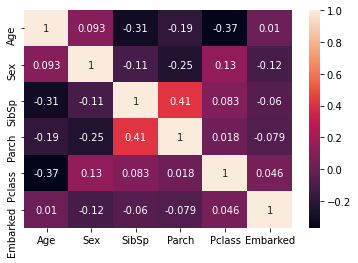

In [ ]:
age_heat = sns.heatmap(titanic_df[["Age","Sex","SibSp","Parch","Pclass","Embarked"]].corr(),annot=True)
plt.show() 

We find that “SibSp”, “Parch” and “Pclass” are relevant to “Age”. Thus, instead of filling those missing ages with the mean value, we should compare the ages of passengers with similar family sizes and classes. If no similar background is found, we fill the missing age with a random value between the mean value minus standard deviation and the mean value plus standard deviation.

In [ ]:
index_NaN_age = list(titanic_df["Age"][titanic_df["Age"].isnull()].index)
 
for i in index_NaN_age :
  age_mean = titanic_df["Age"].mean()
  age_std = titanic_df["Age"].std()
  age_pred_w_spc = titanic_df["Age"][((titanic_df['SibSp'] == titanic_df.iloc[i]["SibSp"]) & (titanic_df['Parch'] == titanic_df.iloc[i]["Parch"]) & (titanic_df['Pclass'] == titanic_df.iloc[i]["Pclass"]))].mean()
  age_pred_wo_spc = np.random.randint(age_mean - age_std, age_mean + age_std)
 
  if not np.isnan(age_pred_w_spc) :
     titanic_df['Age'].iloc[i] = age_pred_w_spc
  else :
     titanic_df['Age'].iloc[i] = age_pred_wo_spc

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
titanic_df.head(5)
X_learning = titanic_df.drop(['SibSp', 'Parch', 'Fare', 'Survived', 'Fare_log', 'PassengerId','Age_wiki','Class'], axis=1)
Y_learning = titanic_df['Survived']

print(X_learning.apply(lambda x: sum(x.isnull()),axis=0))

Pclass        0
Sex           0
Age           0
Embarked      0
Title         0
withParent    0
withSib       0
dtype: int64


now our data is ready and we use K-fold to select a model

In [ ]:
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

random_state = 33
models = []
models.append(("RFC", RandomForestClassifier(random_state=random_state)) )
models.append(("SVC", SVC(random_state=random_state)) )
#models.append(("LoR", LogisticRegression(random_state=random_state)) )
models.append(("LDA", LinearDiscriminantAnalysis()) )
models.append(("QDA", QuadraticDiscriminantAnalysis()) )
models.append(("DTC", DecisionTreeClassifier(random_state=random_state)) )
models.append(("XGB", xgb.XGBClassifier()) )


 
kfold = model_selection.KFold(n_splits=10)
 
for name, model in models:
     #cross validation among models, score based on accuracy
     cv_results = model_selection.cross_val_score(model, X_learning, Y_learning, scoring='accuracy', cv=kfold )
     print("\n[%s] Mean: %.8f Std. Dev.: %8f" %(name, cv_results.mean(), cv_results.std()))


[RFC] Mean: 0.79694132 Std. Dev.: 0.036777

[SVC] Mean: 0.69933833 Std. Dev.: 0.078440

[LDA] Mean: 0.79797753 Std. Dev.: 0.040828

[QDA] Mean: 0.78794007 Std. Dev.: 0.033377

[DTC] Mean: 0.80479401 Std. Dev.: 0.030759

[XGB] Mean: 0.82043695 Std. Dev.: 0.025537


# **Feature Selection **

   Pclass  Sex   Age  Embarked  Title  withParent  withSib
0       3    1  22.0         0      1           0        1
1       1    0  38.0         1      3           0        1
2       3    0  26.0         0      2           0        0
3       1    0  35.0         0      3           0        1
4       3    1  35.0         0      1           0        0
We started with 7 features but retained only 4 of them!
['Pclass' 'Age' 'Embarked' 'Title']


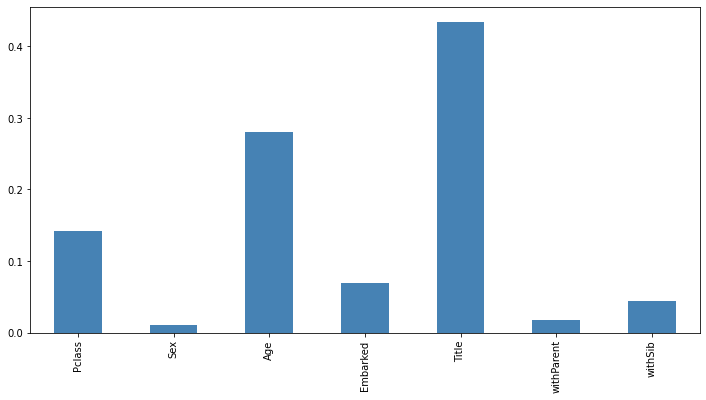

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_learning, Y_learning)
Titanic_df_modified = titanic_df.drop(['SibSp', 'Parch', 'Fare', 'Fare_log', 'PassengerId','Age_wiki','Class'], axis=1)
pd.Series(clf.feature_importances_, index=Titanic_df_modified.columns[1:]).plot.bar(color='steelblue', figsize=(12, 6))



from sklearn.feature_selection import SelectFromModel

clf = DecisionTreeClassifier()


# median (resp. the mean) of the feature importances
trans = SelectFromModel(clf, threshold='median')


titanic_X_trans = trans.fit_transform(X_learning, Y_learning)
print (X_learning.head(5))


print("We started with {0} features but retained only {1} of them!".format(X_learning.shape[1] , titanic_X_trans.shape[1]))

columns_retained_FromMode = Titanic_df_modified.iloc[:, 1:].columns[trans.get_support()].values
print (columns_retained_FromMode)

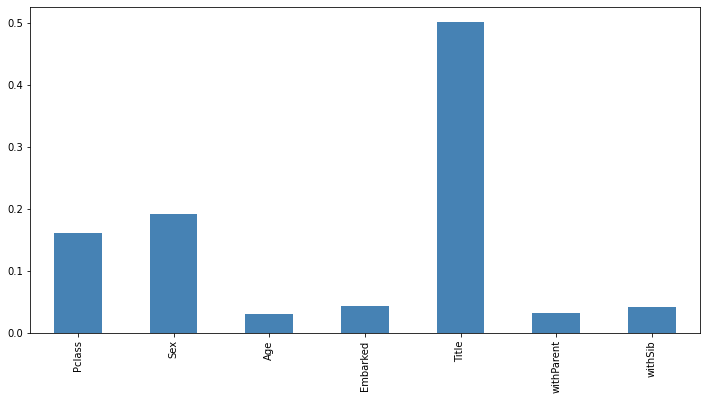

In [ ]:
clf = xgb.XGBClassifier()
clf.fit(X_learning, Y_learning)
Titanic_df_modified = titanic_df.drop(['SibSp', 'Parch', 'Fare', 'Fare_log', 'PassengerId','Age_wiki','Class'], axis=1)
pd.Series(clf.feature_importances_, index=Titanic_df_modified.columns[1:]).plot.bar(color='steelblue', figsize=(12, 6))



Mutual information between two random variables is a non-negative value
which measures the dependency between the variables. 
It is equal to zero if and only if two random variables are independent
and higher values mean higher dependency.

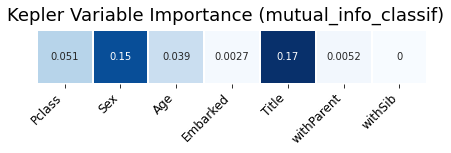

In [ ]:
from sklearn.feature_selection import mutual_info_classif
kepler_mutual_information = mutual_info_classif(X_learning, Y_learning)

plt.subplots(1, figsize=(7, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(Titanic_df_modified.columns[1:], rotation=45, ha='right', fontsize=12)
plt.suptitle("Kepler Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

### Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of** **recursive feature elimination** (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_
#selector.ranking_


array([ True,  True,  True,  True,  True, False, False, False, False,
       False])